In [2]:
import tensorflow as tf
import numpy as np

mnist = tf.keras.datasets.mnist #2828 images of handritten digits 0-9 

#load the data set into variables
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#normalize input if need be
#pixel darkness  is between 0-255, so we want to normalize it so itll be in a smaller range
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

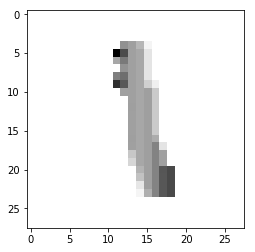

In [6]:
#example of what the image looks like after normalizing 
import matplotlib.pyplot as plt

plt.imshow(x_train[6], cmap = plt.cm.binary) #show this image with a binary (B&W) colormap 
plt.show()


In [7]:
#create the model
model = tf.keras.models.Sequential() #use keras sequential model
model.add(tf.keras.layers.Flatten()) #layer 1: flatten the image into a 1D inputs
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) #(hidden)layer 2: 128 neurons, relu activation
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) #(hidden)layer 3: 128 neurons, relu activation
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax)) #layer 4: output layer, 10 neurons {labels 0-9}, activation is a probability distributio 0-1 

#compile with the training parameters
model.compile(optimizer='adam',   
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy']
             )
model.fit(x_train, y_train, epochs=3) #train on the data for 3 epochs

Instructions for updating:
Colocations handled automatically by placer.
Epoch 1/3
60000/60000 [==============================] - 8s 131us/sample - loss: 0.2671 - acc: 0.9219
Epoch 2/3
60000/60000 [==============================] - 9s 143us/sample - loss: 0.1069 - acc: 0.9676
Epoch 3/3
60000/60000 [==============================] - 8s 125us/sample - loss: 0.0738 - acc: 0.9767


In [8]:
#evaluate the model for over/under fitting
val_loss, val_acc = model.evaluate(x_test, y_test) #run model on test data
print('val_loss=', val_loss, "val_acc=", val_acc)  #print out loss and accuracy


10000/10000 [==============================] - 1s 58us/sample - loss: 0.1104 - acc: 0.9661
val_loss= 0.11039892741013319 val_acc= 0.9661


In [31]:
#save the model
model.save("sentdex-tut-1.model")

In [32]:
#load a model
a_model = tf.keras.models.load_model("sentdex-tut-1.model")

In [36]:
#predict on the model, print first 3 predictions
predictions = a_model.predict([x_test])
print(np.argmax(predictions[6]),np.argmax(predictions[7]),np.argmax(predictions[8]))

7 2 1


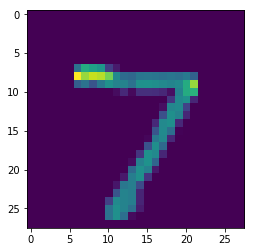

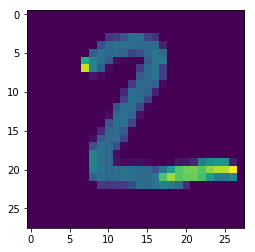

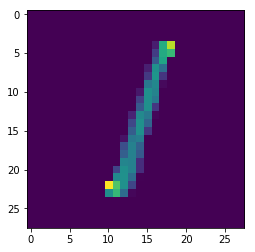

In [37]:
#show the 3 first items passed in
plt.imshow(x_test[0])
plt.show()
plt.imshow(x_test[1])
plt.show()
plt.imshow(x_test[2])
plt.show()